In [1]:
import scineo as sn
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
train,train_y,test,test_y = np.load("DataSet/No4.npy")
train_x,test_x = train.reshape(-1,128*128),test.reshape(-1,128*128)

In [3]:
train_x,test_x = train.reshape(-1,128*128),test.reshape(-1,128*128)
X = np.concatenate([train_x,test_x])
key = list(map(lambda x:x*0.04, range(1,25)))

In [4]:
start = time.time()
l_1 = []
for i in range(3,46):
    mat = sn.pca(X,n_components=i)
    train_x,test_x = mat[:len(train_y)],mat[len(train_y):]
    detail = mat.shape[1]
    l_2 = []
    for j in range(1,31):
        print("")
        print("pca = %.2f\tdetail = %d\tK = %d\t"%(i,detail,j))
        ac = sn.predict_knn(train_x,train_y,test_x,test_y,neighbors=j,show=True)
        l_2.append(ac)
    l_1.append(l_2)
print("\ntiem = %.2fS"%(time.time() - start))


pca = 3.00	detail = 3	K = 1	
training took 0.004628s!
识别率为:82.89%

pca = 3.00	detail = 3	K = 2	
training took 0.004017s!
识别率为:82.76%

pca = 3.00	detail = 3	K = 3	
training took 0.004221s!
识别率为:84.79%

pca = 3.00	detail = 3	K = 4	
training took 0.004199s!
识别率为:85.55%

pca = 3.00	detail = 3	K = 5	
training took 0.004731s!
识别率为:86.31%

pca = 3.00	detail = 3	K = 6	
training took 0.005925s!
识别率为:87.45%

pca = 3.00	detail = 3	K = 7	
training took 0.005668s!
识别率为:87.96%

pca = 3.00	detail = 3	K = 8	
training took 0.006071s!
识别率为:87.45%

pca = 3.00	detail = 3	K = 9	
training took 0.005439s!
识别率为:87.71%

pca = 3.00	detail = 3	K = 10	
training took 0.006062s!
识别率为:87.20%

pca = 3.00	detail = 3	K = 11	
training took 0.006260s!
识别率为:87.58%

pca = 3.00	detail = 3	K = 12	
training took 0.006357s!
识别率为:87.71%

pca = 3.00	detail = 3	K = 13	
training took 0.006430s!
识别率为:87.71%

pca = 3.00	detail = 3	K = 14	
training took 0.007143s!
识别率为:87.58%

pca = 3.00	detail = 3	K = 15	
training took 0.007178s!
识

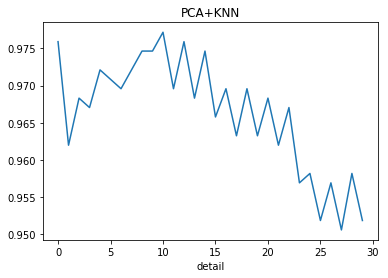

In [13]:
plt.plot(l[13])
plt.title("PCA+KNN")
plt.xlabel("detail")
plt.show()

In [12]:
pk = pd.DataFrame(l_1)
pk.columns = list(range(1,31))
pk.index = list(range(3,46))
#pk.to_csv("DataSet/pac_knn.csv")
print("训练样本数:%d\t测试样本数:%d"%(len(train_x),len(test_y)))
print("最大识别率:%.2f%%"%(pk.max().max()*100))
print("横坐标为KNN参数, 纵坐标为PCA提起的特征维数")
print(pk)


训练样本数:1342	测试样本数:789
最大识别率:99.24%
横坐标为KNN参数, 纵坐标为PCA提起的特征维数
          1         2         3         4         5         6         7   \
3   0.828897  0.827630  0.847909  0.855513  0.863118  0.874525  0.879594   
4   0.873257  0.887199  0.888466  0.903676  0.892269  0.907478  0.903676   
5   0.893536  0.904943  0.911280  0.912548  0.904943  0.911280  0.906210   
6   0.920152  0.927757  0.922687  0.922687  0.915082  0.913815  0.913815   
7   0.915082  0.903676  0.913815  0.912548  0.918885  0.906210  0.906210   
8   0.929024  0.913815  0.931559  0.922687  0.925222  0.920152  0.925222   
9   0.944233  0.935361  0.949303  0.945501  0.955640  0.946768  0.948035   
10  0.958175  0.956907  0.970849  0.964512  0.974651  0.965779  0.973384   
11  0.960710  0.961977  0.972117  0.970849  0.975919  0.968314  0.973384   
12  0.972117  0.972117  0.982256  0.980989  0.987326  0.988593  0.987326   
13  0.974651  0.974651  0.982256  0.978454  0.992395  0.984791  0.984791   
14  0.980989  0.975919  0.98

In [26]:
pk.values == pk.max().max()


numpy.ndarray

In [29]:
def show_max(mat):
	for i in mat.columns:
		for j in mat.index:
			if mat[i][j] == mat.max().max():
				print("n = %s\tk = %s\t有最大识别率:%.2f%%"%(j,i,mat.max().max()*100))

In [30]:
show_max(pk)

n = 13	k = 5	有最大识别率:99.24%
